**Task 0: Import libraries**

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns

**Task 1: Download/Import Dataset**

Monta Google Drive nell'ambiente di Google Colab per accedere ai file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Carica i dati dal file Titanic-Dataset.csv situato su Google Drive e mostra le prime 5 righe del DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



**Task 2: Exploring the data**


Visualizza le informazioni sul DataFrame, inclusi il tipo di dati e le informazioni sulla memoria.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Restituisce l'elenco delle colonne nel DataFrame.

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Task 3: Preparing the data**

**Normalization of the data**


Rimuove le colonne "PassengerId", "Name", "Ticket", "Cabin" e "Embarked" dal DataFrame.
Successivamente, normalizza le colonne "Age", "SibSp", "Parch" e "Fare" calcolando la media e la deviazione standard di ciascuna colonna e quindi standardizzando i valori.
Infine, visualizza le prime righe del DataFrame modificato.

In [ ]:
df.drop(["PassengerId", "Name","Ticket","Cabin","Embarked"], axis="columns",inplace=True)

continuous_fields = ['Age', 'SibSp', 'Parch', 'Fare']

scaled_features = {}
for field in continuous_fields:
    mean = df[field].mean()
    std = df[field].std()
    scaled_features[field] = [mean, std]
    df.loc[:, field] = (df[field] - mean)/std

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,-0.530005,0.432550,-0.473408,-0.502163
1,1,1,female,0.571430,0.432550,-0.473408,0.786404
2,1,3,female,-0.254646,-0.474279,-0.473408,-0.488580
3,1,1,female,0.364911,0.432550,-0.473408,0.420494
4,0,3,male,0.364911,-0.474279,-0.473408,-0.486064


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Crea una variabile X che contiene il DataFrame df con la colonna "Pclass" rimossa e una variabile Y che contiene solo la colonna "Pclass" (target).

In [ ]:
X = df.drop("Pclass", axis=1)
Y = df["Pclass"]


Mappa i valori nella colonna "Sex" di X, assegnando 0 a "male" e 1 a "female".

In [ ]:
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,0,-0.530005,0.432550,-0.473408,-0.502163
1,1,1,0.571430,0.432550,-0.473408,0.786404
2,1,1,-0.254646,-0.474279,-0.473408,-0.488580
3,1,1,0.364911,0.432550,-0.473408,0.420494
4,0,0,0.364911,-0.474279,-0.473408,-0.486064



Riempi i valori mancanti nella colonna "Age" di X con la media dei valori esistenti.

In [ ]:
X.Age = X.Age.fillna(X.Age.mean())
X.Age

0     -5.300051e-01
1      5.714304e-01
2     -2.546462e-01
3      3.649113e-01
4      3.649113e-01
           ...     
886   -1.858065e-01
887   -7.365243e-01
888    2.338621e-16
889   -2.546462e-01
890    1.583921e-01
Name: Age, Length: 891, dtype: float64

Dividi il dataset in due parti usando la funzione train_test_split(): 80% per training e 20% per testing.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8)

**Task 4: Define the SVM**

Crea un modello di Support Vector Machine (SVM) utilizzando il kernel 'rbf' (Radial Basis Function) e il parametro di regolarizzazione C impostato a 1E5.

In [ ]:
 svm_model = SVC(kernel='rbf', C=1E5)

**Task 5: Train**


Addestra il modello SVM utilizzando i dati di addestramento (X_train e Y_train) e quindi esegui previsioni sui dati di test (X_test), memorizzando i risultati nelle variabili Y_pred.

In [ ]:
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

**Task 6: Show results and compare different values of C**

Stampa il classification report e la matrice di confusione.

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.94      0.91        49
           2       0.59      0.62      0.60        26
           3       0.92      0.88      0.90       104

    accuracy                           0.86       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.86      0.86      0.86       179



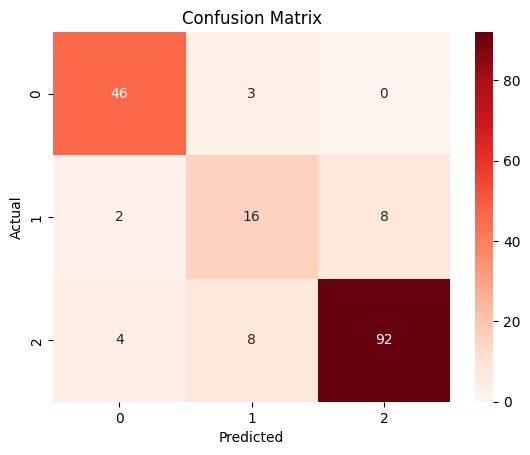

In [ ]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Esegui una validazione incrociata a 5 fold (KFold) con shuffle, utilizzando il modello SVM (svm_model) e i dati X e Y. Calcola la media delle score ottenute in ogni fold e restituiscila come risultato. Otteniamo così una stima della performance del modello tramite la cross-validation.

In [ ]:
kf_svc = KFold(n_splits=5,shuffle=True)
cv_svc = cross_val_score(svm_model, X, Y, cv=kf_svc)
np.mean(cv_svc)

0.8305191136777352

**Changing kernel and C values**

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.88      0.91        49
           2       0.57      0.62      0.59        26
           3       0.90      0.90      0.90       104

    accuracy                           0.85       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.86      0.85      0.86       179



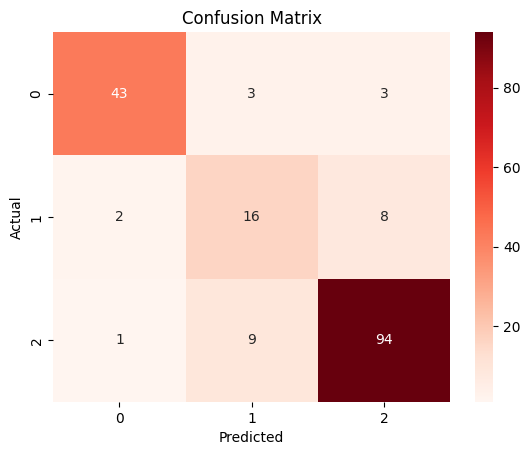

In [ ]:
svm_model = SVC(kernel='rbf', C=1E3)
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.88      0.91        49
           2       0.63      0.65      0.64        26
           3       0.90      0.92      0.91       104

    accuracy                           0.87       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.87      0.87      0.87       179



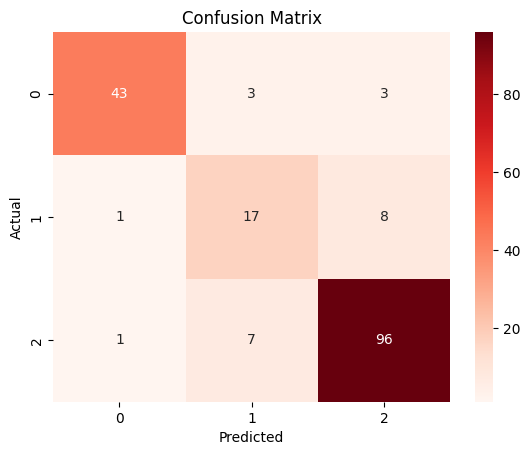

In [ ]:
svm_model = SVC(kernel='rbf', C=200)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.88      0.90        49
           2       0.51      0.77      0.62        26
           3       0.95      0.85      0.89       104

    accuracy                           0.84       179
   macro avg       0.79      0.83      0.80       179
weighted avg       0.87      0.84      0.85       179



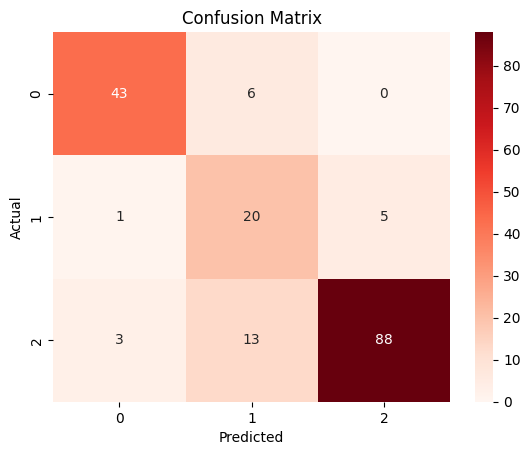

In [ ]:
svm_model = SVC(kernel='rbf', C=1E6)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.94      0.87        49
           2       0.58      0.73      0.64        26
           3       0.92      0.79      0.85       104

    accuracy                           0.82       179
   macro avg       0.77      0.82      0.79       179
weighted avg       0.84      0.82      0.82       179



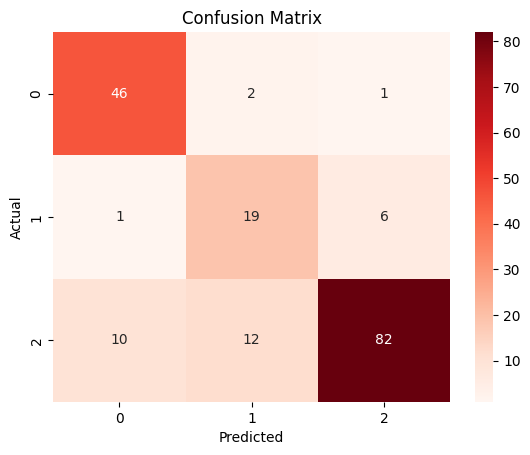

In [ ]:
svm_model = SVC(kernel='rbf', C=1E8)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Kernel = linear

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96        49
           2       0.80      0.46      0.59        26
           3       0.86      0.95      0.90       104

    accuracy                           0.88       179
   macro avg       0.87      0.79      0.82       179
weighted avg       0.88      0.88      0.87       179



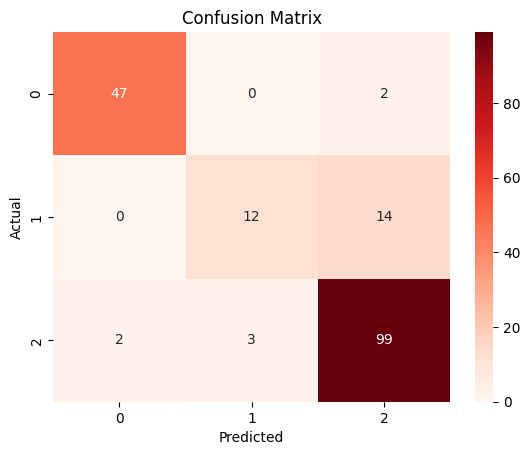

In [ ]:
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96        49
           2       0.80      0.46      0.59        26
           3       0.86      0.95      0.90       104

    accuracy                           0.88       179
   macro avg       0.87      0.79      0.82       179
weighted avg       0.88      0.88      0.87       179



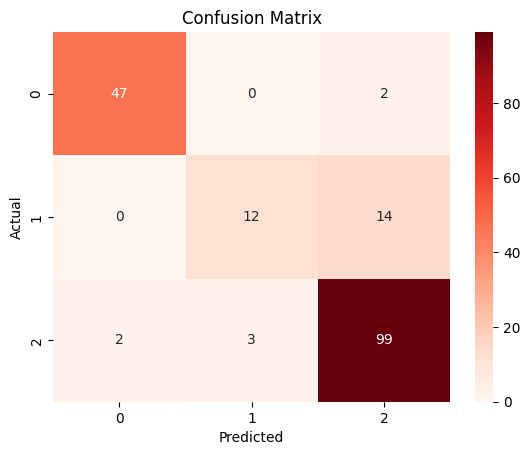

In [ ]:
svm_model = SVC(kernel='linear', C=1E4)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()